# Home Credit Default Risk - Kaggle Competition

### Table of Contents:
1. [Definition](#def) <br>
    1.1 [Project Overview](#overview) <br>
    1.2 [Problem Statement](#problem)<br>
    1.3 [Metrics](#metrics)<br>
2. [Analysis](#analysis)<br>
    2.1 [Data Exploration](#exploration)<br>
    2.2 [Exploratory Visualization](#exploration_viz)<br>
3. [Algorithms and Techniques](#algos)<br>
    3.1 [Random Forest](#random_forest)<br>
    3.2 [Light GBM](#light_GBM)<br>
    3.3 [Benchmark: Logistic Regression](#benchmark)<br>
4. [Data Processing](#processing)<br>
    4.1 [Joining the Datasets](#joining)<br>
    4.2 [Label Encoding and One-Hot Encoding](#encoding)<br>
    4.3 [Feature Engineering and Feature Selection](#feature_eng)<br>
    4.4 [Missing Values and Feature Scaling](#missing)<br>
5. [Results](#results)<br>
    5.1 [Data Preparation](#preparation)<br>
    5.2 [Logistic Regression](#logistic)<br>
    5.3 [Random Forest](#random)<br>
    5.4 [Light GBM](#gbm)<br>
6. [Final Model](#final)<br>
    6.1 [Refinement](#refinement)<br>
    6.2 [Discussion](#discussion)<br>
7. [Conclusion](#conclusion)<br>
    7.1 [Free-Form Visualization: ROC curve](#free_form)<br>
    7.2 [Reflection](#reflection)<br>
    7.3 [Improvement](#improvement)<br>
7. [References](#references)<br>

# 1. Definition<a id="def"></a>

## 1.1 Project Overview <a id="overview"></a>

The  [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk) competition is run on [Kaggle](https://www.kaggle.com/) in partnership with [Home Credit Group](https://www.kaggle.com/home-credit-group) to provide them with Machine Learning methods to better predict the probability of a potential lender to repay their loan. <br>

The primary reason behing this Machine Learning competition is caused by the fact that many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Hence, this Machine Learning competition and Machine Learning outcomes may result in broadening financial inclusion for the unbanked population by providing a positive and safe borrowing experience. <br>

In order to make sure under-served population have a positive loan experience, Home Credit has provided a variety of datasets (including telco and transactional information) to predict their clients' repayment abilities. This will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. <br>

## 1.2 Problem Statement <a id="problem"></a>

In this study, we will attempt to solve the following problem statement is: <br>
**Can we predict how capable each applicant is of repaying a loan?** <br>

The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard **supervised classification problem** where the label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan). In this study, our target variable Y is the probability associated with the lender paying back their loan. Therefore, this is a **regression** supervised learning problem.<br>

**Supervised learning** is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output, in other words Y = f(X). The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data. <br>

## 1.3 Metrics <a id="metrics"></a>
The metrics chosen to measure performance of the results provided by the model in this project will be similar to the onse used in the Kaggle Competition, namely the results will be on evaluated on area under the ROC curve between the predicted probability and the observed target. <br>

The ROC curve (Receiver Operating Characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. An ROC curve plots True Positive Rate vs. False Positive Rate at different classification thresholds.

The **Area Under the ROC Curve**, also known as AUC, measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

# 2. Analysis <a id="analysis"></a>

## 2.1. Data Exploration <a id="exploration"></a>

Home Credit provided several datasets to Kaggle as part of the competition. Indeed, Home Credit has provided a variety of datasets (including telco and transactional information) to predict their clients' repayment abilities. Seven separate *.csv  files were provided as part of the competition: <br>
1. **application_{train|test}.csv**: This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). Static data for all applications. One row represents one loan in our data sample.

2. **bureau.csv**: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

3. **bureau_balance.csv**: Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

4. **POS_CASH_balance.csv**: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

5. **credit_card_balance.csv**: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

6. **previous_application.csv**: All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

7. **installments_payments.csv**: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [1]:
import pandas as pd
import numpy as np
import os
import re
from scipy import stats
from scipy.stats import norm, skew
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore') # Suppress warnings 

In [2]:
# List files available
print(os.listdir("../input/"))

Firstl, let's have a look at the main datasets 'application_{train|test}.csv' datasets.

In [3]:
# importing the datasets into Pandas dataframes
data_test = pd.read_csv('../input/application_test.csv')
df_test = data_test.copy()
data_train = pd.read_csv('../input/application_train.csv')
df_train = data_train.copy()

The training dataset features 307,511 observation for 122 features. The testing dataset features 48,744 observations for 121 features (the same features as in the training set minus the 'TARGET' variable.

In [4]:
(df_train.shape, df_test.shape)

Let's have a look at the first 5 rows on the training and testing dataframes (shown below). We can see a variety of features and their associated data. 

In [5]:
df_train.head()

In [6]:
df_test.head()

The training set contains 122 features, including the 'TARGET' variable. The testing set contains the same features minus the Target variable ['TARGET']. A list of the 122 features was provided by Home Credit with descriptions for each feature. These include:
- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
- CODE_GENDER: Gender of the client
- CNT_CHILDREN: Number of children the client has
- AMT_CREDIT: Credit amount of the loan
- DAYS_EMPLOYED: How many days before the application the person started current employment

From an initial look at the 121 features, I intuitively identified 42 variables that I believe would have a non-negligible influence (or correlation) with the ability of a borrower to repay their loan. However, all features will be kept in the dataframe at this initial stage. A subset of the 121 features is lister below:

In [7]:
df_train.columns

Although, the datasets were all joined at first using merges and inner joins (using the method/code shown below), the full dataset ended up being several millions of rows and computational time for data manipulation increased to several hours. Hence, in this study, we will focus on the main 'application_{train|test}.csv' dataset. 

Although not part of this study, an example of an 'inner left join' using Python on key 'SK_ID_BUREAU' is shown below.

In [8]:
# importing the datasets into Pandas dataframes
bureau_balance = pd.read_csv('../input//bureau_balance.csv')
bureau = pd.read_csv('../input//bureau.csv')
# left joining the dataset on='SK_ID_BUREAU'(left=bureau, right=bureau_balance)
df_bureau_joined = bureau.merge(bureau_balance, 
                                on='SK_ID_BUREAU', 
                                how='left')

In [9]:
df_bureau_joined.head()

## 2.2 Exploratory Visualization <a id="exploration_viz"></a>

In this section, we will provide data visualizations that summarizes or extracts relevant characteristics or feature of selected features in our dataset. 

### 2.2.1 Feature: 'TARGET'

The feature 'TARGET' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'TARGET' by using other related features associated with the client's personal, professional, and credit history. <br> 

Let's have a look at the distribution of the feature 'TARGET' in the Training dataset. The 'TARGET' feature has the value  '0' (will repay loan on time) for 282.686 observations and the value '1' (will have difficulty repaying loan) for 24,825 observations.

In [10]:
target = df_train['TARGET']  #target variable

In [11]:
target.value_counts()

Let's plot a histogram to visualize the distribution of TARGET in the Training dataset.

In [12]:
plt.ylabel('Instances')
plt.xlabel('TARGET value')
plt.title('Target Variable Distribution (Training Dataset)')
sns.countplot(x='TARGET', data=df_train);

In [13]:
target.value_counts()[0]/(target.value_counts()[0]+target.value_counts()[1])

As shown on the chart above, we see this is an imbalanced class problem. There are clearly many more loans that were repaid on time than loans that were not repaid. Indeed, observations with 'TARGET' value at 0 constitue 91.9% of the Training dataset. <br>

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### 2.2.2 Feature: 'DAYS_BIRTH'

The feature 'DAYS_BIRTH' describes Client's age in days at the time of the application. The values of the feature are negative and the correlation factor is positive which means that as the client gets older, they are less likely to default on their loan. Let's plot the distribution of the 'DAYS_BIRTH' feature in the Training datasets. 

In [14]:
# Plot the distribution of ages in years
age_years = df_train['DAYS_BIRTH'] / -365
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
plt.hist(age_years, edgecolor = 'k', bins = 25)
plt.xlim(17,73)
plt.ylim(0,20000)
(mu, sigma) = norm.fit(age_years)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Distribution of Age of Client (in Years)')
plt.xlabel('Age (years)')
plt.ylabel('Count in Dataset');

To get a better representation of the distribution, let's split the data in DAYS_BIRTH to represent the distribution of Repaid (Target=0) and Not Repaid (Target=1) Loans as a funciton of the Client's Age. To do this, we'll create a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It will allow us to identify if there is a correlation between the Age of the Client and their ability to pay it back.

As we can see below, the plot indicates that the ratio of loans not repaid (Target=1) decreases as the client ages. In other words, the client's ability to repay their loan seems to improve with the client's age.

In [15]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Not Repaid Loan')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Age of Client (in Years)');

This is further emphasized in the plot below, in which the unrepaid loans (Target=1) are grouped together in brackets corresponding go the Client's Age. The plot clearly indicates that as the client ages, the rate of unpaid loan decreases.

In [16]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data.loc[:,'DAYS_BIRTH'].copy() / -365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [17]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Client\'s Age Range');

### 2.2.3 Feature: 'NAME_CONTRACT_TYPE'

The feature 'NAME_CONTRACT_TYPE' identifies if loan is cash or revolving. The vast majority of loans were 'Cash' loans, at 90.5% of loans in the Training set.

In [18]:
df_train['NAME_CONTRACT_TYPE'].value_counts()

The chart below shows the types and contracts in the training set by target value. The ratio of loans not repaid (Target =1) for Cash loans is 8.35%, while the ratio of loans not repaid (Target =1) for Revolding loans is 5.48%.

In [19]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(10,5))
plt.ylabel('Count')
plt.title('Contract Types by Target Value')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df_train);

### 2.2.4 Feature: 'AMT_CREDIT'

The 'AMT_CREDIT' feature describes the credit amount of the loan. As can be seen in the plot below, the distribution of repair and not repaid loans follow a similar distribution. Certain brackets of loans, for instance the range of loans between 400,000 and 600,000 have a higher ration of not repaid loans.

In [20]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'AMT_CREDIT'], 
            label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'AMT_CREDIT'], 
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit')
plt.xticks(np.arange(0, 5000000, 500000))
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

### 2.2.5 Feature: 'DAYS_EMPLOYED'

The 'DAYS_EMPLOYED' feature describes how many days before the application the person started current employment. As can be seen in the plot below, the distribution of Not Repaid Loans peaks at DAYS_EMPLOYED around zero. Values equal to and below zero are likely to indicate that the individual is unemployed. <br>

Hence that would impact that individual's ability to repair their loans. The ability of an individual to repair their loan seems to be positively correlated to the duration of employment at their current job.

In [21]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_EMPLOYED'], 
            label = 'Repaid Loan')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_EMPLOYED'], 
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit')
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

## 2.3 Correlation <a id="correlation"></a>

Let's take a look at some of more significant correlations. Let's focus on top most strongly correlated factors with the feature 'TARGET'. As shown below, these features are related to the Region where the client is from as well the Exteral Sources 1, 2 and 3. These correspond to normalized score from external data sources.

In [22]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Let's plot a heatmap to visualize the correlation between TARGET and these factors. The heatmap clearly indicates the correlation factors as shown above as well as inter-feature correlation such as the strong correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY.

In [26]:
df_train_corr = df_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
                          'DAYS_LAST_PHONE_CHANGE','FLOORSMAX_AVG','DAYS_EMPLOYED','EXT_SOURCE_1', 
                          'EXT_SOURCE_2', 'EXT_SOURCE_3']].copy()

In [27]:
# Calculate correlations
corr = df_train_corr.corr()
# Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, linewidths=.2, cmap="YlGnBu");

# 3. Algorithms and Techniques <a id="algos"></a>

In this section, we will need to discuss the algorithms and techniques we intend to use for solving the problem.

## 3.1 Random Forest <a id="random_forest"></a>

Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.<br>

Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

Random Forest can be implemented using Python's sklearn library (ie sklearn.ensemble.RandomForestClassifier). A number of parameters are provided by defaults by sklearn (see below) such as:
- number of estimators (ie number of trees in the forest)
- max_features (ie number of features to consider when looking for the best split)
- min_samples_leaf (ie minimum number of samples required to be at a leaf node)

## 3.2 Light GBM <a id="light_GBM"></a>

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Light GBM splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

Light GBM uses leaf wise splitting over depth wise splitting which enables it to converge much faster but also leads to overfitting. Key parameters in Light GBM are:
- num_iterations: number of boosting iterations to be performed ; default=100; type=int
- num_leaves : number of leaves in one tree ; default = 31 ; type =int
- min_data_in_leaf : Min number of data in one leaf.
- max_depth: Specify the max depth to which tree will grow. This parameter is used to deal with overfitting.

LightGBM can be implemented using the latest release on Microsoft's GitHub portal: https://github.com/Microsoft/LightGBM

## 3.3 Benchmark: Logistic Regression <a id="benchmark"></a>
In this section, we will provide a defined benchmark result or threshold for comparing across performances obtained by your solution.

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed previously. Hence, it provides us with a good benchmark. <br>

Binary logistic regression requires the dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. Also, the features should be independent of each other. The model should have little or no multicollinearity. <br>

# 4 Data Preprocessing <a id="processing"></a>

## 4.1 Joining Datasets <a id="joining"></a>

To ensure that pre-processing tasks and transformations are applied to both the Training and Testing sets, I have joined them using Panda's pd.concat function which concatenates pandas objects along a particular axis. I've also used the align function to ensure that features only present in both dataframes are joined together in a new Pandas dataframe df_full. Furthermore, to keep track of the source dataset of each observation, an additional boolean feature named 'training_set' has been added.

In [23]:
# Align the training and testing data, keep only columns present in both dataframes
df_train = df_train.drop('TARGET', axis=1) #drop target variable from training dataset
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

In [28]:
df_train.shape, target.shape, df_test.shape

In [26]:
#assing an extra variable to training and testing dataset before joining them
df_train['training_set'] = True 
df_test['training_set'] = False

In [27]:
df_full = pd.concat([df_train, df_test]) #concatenate both dataframes
df_full = df_full.drop('SK_ID_CURR', axis=1) #drop SK_ID_CURR variable
df_full.shape

The size of the joined full dataset df_full is 356,255 obersvations for 121 features.

In [29]:
print('Size of Full dataset df_full is: {}'.format( df_full.shape))

## 4.2 Label Encoding and One-Hot Encoding <a id="encoding"></a>

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding and One Hot Encoding becomes necessary as they encode categorical labels with value between 0 and 1.

In [30]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [31]:
# let's break down the columns by their type (i.e. int64, float64, object)
df_full.dtypes.value_counts()

In [32]:
le_count = 0
for col in df_full.columns[1:]:
    if df_full[col].dtype == 'object':
        if len(list(df_full[col].unique())) <= 2:
            le.fit(df_full[col])
            df_full[col] = le.transform(df_full[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

In [33]:
# convert rest of categorical variable into dummy
df_full = pd.get_dummies(df_full)

Encoding the features increased the number of features in our dataset to 243.

In [34]:
print('Size of Full Encoded Dataset', df_full.shape)

## 4.3 Feature Engineering <a id="feature_eng"></a>

Feature Engineering is the process of creating the most useful features out of the data. Feature engineering typically involves both creating new features from the existing data, and feature selection by choosing only the most important features.

### 4.3.1 Features: FLAG_DOCUMENT

The datasets features 20 variables related to whether a client has provided a particular form. Let's see if these variables can be dropped from the training dataset by looking at the correlation between the FLAG_DOCUMENT variables and the TARGET variable.

In [35]:
df_train['TARGET'] = target
df_doc_corr = df_train[['TARGET','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                        'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                        'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                        'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                        'FLAG_DOCUMENT_21']].copy()

Looking at the correlation between the documents and the TARGET variables, the Top 4 documents that stand out as having correlations to be included in the training dataset: FLAG_DOCUMENT_3 at 0.044346, FLAG_DOCUMENT_6 at -0.028602, FLAG_DOCUMENT_16 at -0.011615, and FLAG_DOCUMENT_13 at -0.011583. 

In [36]:
# Find correlations with the target and sort
correlations = df_doc_corr.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

In [37]:
# Calculate correlations
corr = df_doc_corr.corr()
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidths=.2, cmap="YlGnBu");

Hence, we will only keep FLAG_DOCUMENT_3, FLAG_DOCUMENT_6, FLAG_DOCUMENT_13, and FLAG_DOCUMENT_16 in our training dataset and drop the other  16 FLAG_DOCUMENT features from the training dataset.

In [38]:
df_full = df_full.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
                        'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 
                        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15'], axis=1)

## 4.4 Missing Values and Feature Scaling <a id="missing"></a>

Decision-tree based algorithms, such as Random Forest, can be modified to take missing values into consideration. However, this adds computational cost because of the modifications that would need to be implemented. <br>

Adding this computational cost may not outweigh the improvement. Hence, imputation in pre-processing is generally preferred (imputing refers to using a model to replace missing values).

As we can see below, we have over 20 categories with more than 50% of values missing.

In [39]:
def missing_val_ratio(df):
    perc_na = (df.isnull().sum()/len(df))*100
    ratio_na = perc_na.sort_values(ascending=False)
    missing_data_table = pd.DataFrame({'% of Total Values' :ratio_na})
    return missing_data_table

In [40]:
df_full_miss = missing_val_ratio(df_full)
df_full_miss.head(20)

Looking at the distribution shown below, it is clear that quite a number of features have a non-negligible amount of missing values. We could either discard them or impute them (ie replace missing values) with another value such as the median or the mean for that particular feature. <br>

Out of the 121 features in df_full, 55% have all values present (no missing values), while 40.99% of the features have over 50% of missing values.

In [41]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
x = df_full_miss['% of Total Values']
x.hist(align='left', bins= 15)
plt.xticks(np.arange(0, 75, 5))
plt.xlabel('% of Missing Values')
plt.ylabel('Count (Features)')
plt.title('Distribution of % of Missing Values in Dataset Features');
plt.show();

To improve the performance of the Machine Learning arlgorithms, we will keep all features and address the missing values by replacing them with the median value if the feature is numerical and with "N/A" if the feature is categorical. <br>

We will also normalize the range of the features to scale them between values 0 and 1. We will iterate through each column of the master dataframe df_full using sklearn's MinMaxScaler to scale the features.

In [42]:
from sklearn.preprocessing import MinMaxScaler, Imputer
imputer = Imputer(strategy = 'median') # Median imputation of missing values
scaler = MinMaxScaler(feature_range = (0, 1)) # Scale each feature to 0-1

In [43]:
for column in df_full.columns:
    df_full[[column]] = imputer.fit_transform(df_full[[column]])
    df_full[[column]] = scaler.fit_transform(df_full[[column]])

After imputing and scaling, features such as AMT_INCOLE_TOTAL and AMT_CREDIT are scaled to values between 0 and 1, while feature values that were previously equal to 0 or 1 (as a result of encoding) remain unchanged from int to floating values. The transformed dataframe has 356,255 observations of 232 features. <br>

As shown below, we no longer have missing values in our dataframe.

In [44]:
df_full_miss = missing_val_ratio(df_full)
df_full_miss.head(5)

# 5. Results <a id="results"></a>

## 5.1 Data Preparation <a id="preparation"></a>

Firslty, prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [45]:
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

The final training set consists of 307,511 obersations of 232 features while the testing set is made up of 48,744 observations of 231 features.

In [46]:
print('Size of training_set: ', df_train.shape)
print('Size of testing_set: ', df_test.shape)

In [ ]:
print('Size of target: ', target.shape)
print('Size of original data_test: ', data_test.shape)

## 5.2 Logistic Regression <a id="logistic"></a>

Let's first apply the Logistic Regression algorithm as a baseline for our more sophisticated solutions later on. We will use default values as provided by sklearn's library.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(random_state = 42)
# Train on the training data
log_reg.fit(df_train, target)
log_reg_predict = log_reg.predict(df_test)
#roc_auc_score(y_test, log_reg_predict)

We get a baseline ROC AUC score of **0.504** which is about the same as flipping a coin for prediction. Submitting the results from the Testing dataset to the Kaggle Competition portal yielded the same ROC AUC score.

## 5.3 Random Forest <a id="random"></a>

Let's now apply the Random Forest algorithm which should yield a better score in its predictions than Logistic Regression. We will use default values as provided by sklearn's library.

In [49]:
from sklearn.ensemble import RandomForestClassifier
# Train on the training data
rf_model = RandomForestClassifier() 
rf_model.fit(df_train, target)

For this initial run, the RandomForest alogorithm was run with default values such as the minimum number of samples required to split an internal node set to 2 (min_samples_split=2), the minimum number of samples required to be at a leaf node (min_samples_leaf=1), and the number of trees in the forest set to 10 (n_estimators=10) amongst others. <br>

The model was fitted to the training and target data, and it can now be used to make predictions for the testing dataset df_test.

In [50]:
random_forest_pred = rf_model.predict_proba(df_test)[:, 1]

The predictions wew submitted to Kaggle for evaluation and we get a baseline ROC AUC score of **0.610**.

## 5.4 Light GBM <a id="gbm"></a>

Finally, we'll apply our last algorithm: Light GBM which should yield a better score in its predictions than Logistic Regression and Random Forest. We will use default values as provided by Light GBM's library.

In [51]:
from lightgbm import LGBMClassifier
LGB_clf = LGBMClassifier(n_estimators=100, 
                         boosting_type='gbdt', 
                         objective='binary', 
                         metric='binary_logloss')
LGB_clf.fit(df_train, target)
LGB_clf_pred = LGB_clf.predict_proba(df_test)[:, 1]

Once again, for this initial run, the alogorithm was run with default values. Key hyper-parameters for LightGBM include num_leaves (set the number of leaves to be formed in a tree, default = 31), min_data_in_leaf (minimum data points in a leaf, default = 20), max_depth (maximum depth or level up to which tree can grow), and num_iterations (number of boosting iterations, default = 100) amongst others.

The model was fitted to the training and target data, and it can now be used to make predictions for the testing dataset df_test.

We get a baseline ROC AUC score of **0.745** which is our best score so far. LightGBM can of course be tuned further. We will fine-tune both Random Forest and Light GBM in the next section. <br>

In summary, the baseline and decision-tree based methods using default parameters have given us the following scores so far:
- Logistic Regression: 0.503
- Random Forest: 0.610
- Light GBM: 0.745

# 6 Tuned Models <a id="tuned"></a>

## 6.1 Refinement <a id="refinement"></a>

The process of refinement will focus on hyper-parameter tuning. The use of methods such as GridSearchCV (an exhaustive method which seaches over specified parameter values for an estimator) or RandomizedSearchCV (a randomized search on hyper parameters) are great but can be quite computationally expensive, especially with large datasets. The implementation of such methods relies on optimisation by cross-validated grid-search over a parameter grid. <br>

After several hours of RandomizedSearchCV going over parameters, I have decided to proceed with educated picks for hyper-parameters. After this project is complete, I may investigate the use of an AWS EC2 instance to improve my ROC AUC score.

### 6.1.1 Random Forest Classifier HyperParameters

For this second run, the RandomForest algorithm was run with an increased number of estimators (from 10 to 200). To avoid over-fitting, min_samples_split (min number of data points placed in a node before the node is split) was set to 10 while min_samples_leaf was set to 5 (min number of data points allowed in a leaf node).

In [53]:
# Train on the training data
opt_rf_model = RandomForestClassifier(n_estimators=200, 
                                      min_samples_split=10, 
                                      min_samples_leaf=5, 
                                      n_jobs=-1, 
                                      random_state=42) 
opt_rf_model.fit(df_train, target)
opt_RF_pred = opt_rf_model.predict_proba(df_test)[:, 1]

The Top 5 features according to Random Forest are: EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH, and DAYS_EMPLOYED. <br>
The predictions are submitted to Kaggle for evaluation and we get a baseline ROC AUC score of **0.723**.

### 6.1.2 LightGBM Classifier HyperParameters

In [56]:
LGBM_clf = LGBMClassifier(n_estimators = 10000,
                          learning_rate = 0.02,
                          min_data_in_leaf = 30,
                          num_leaves = 31,
                          boosting_type='gbdt', 
                          objective='binary', 
                          metric='binary_logloss')
LGBM_clf.fit(df_train, target)
LGBM_clf_pred = LGBM_clf.predict_proba(df_test)[:, 1]

In [57]:
# Make a submission dataframe
submission = data_test[['SK_ID_CURR']]
submission['TARGET'] = LGBM_clf_pred

# Save the submission file
submission.to_csv("light_gbm_preds.csv", index=False)

We get a baseline ROC AUC score of **0.758** which is our best score so far.

## 6.2 Discussion <a id="discussion"></a>

In this section, we'll compare the final solution and its results and compare them to the benchmark we established earlier in the project. Let's have a look at a summary table of teh ROC AUC scores for each algorithm.

In [57]:
d = {'1. Logistic Regression': [0.504], 
     '2. Default Random Forest': [0.610], 
     '4. Default Light GBM': [0.745], 
     '3. Tuned Random Forest': [0.723],
     '5. Tuned Light GBM': [0.758]}
d_i = ['ROC AUC Score']
df_results = pd.DataFrame(data=d, index = d_i)
df_results = df_results.transpose()

In [58]:
df_results

Clearly the tuned Light GBM algorithm provides us with the best ROC AUC score at **0.758**. 

# 7. Conclusion <a id="conclusion"></a>

## 7.1 Free-Form Visualization: ROC Curves <a id="free_form"></a>

A free-form viz that best visualizes the outcome of this project is a plot of the ROC curves. For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis. A classifier with no power will sit on the diagonal (essentially random guessing: 0.5), whilst most classifiers (as does ours) fall somewhere in between. The ROC curve can be used to select a threshold for a classifier which maximises the true positives, while minimising the false positives. <br>

Below we can the see ROC Curves for the Light GBM algorithm. We can clearly see that te ROC curve for class 0 and 1 covers an area equivalent to 0.76, corresponding to our ROC AUC score. The plot best summarizes the predictive outcome performance from this project.

In [59]:
#import scikitplot as skplt
#import matplotlib.pyplot as plt
#skplt.metrics.plot_roc(y_test, LGBM_clf.predict_proba(X_test), figsize=(12,6))
#plt.show();

<center><img src="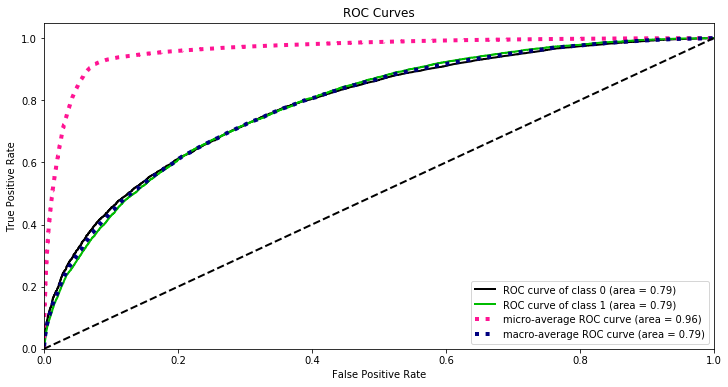%0A"> <br></center>

## 7.2 Reflection <a id="reflection"></a>

Kaggle competition are great, humbling experiences. I remember taking several hours to complete the 'Getting Started' competitions Titanic and Housing Predictions and they were realy eye-opening experiences. To me, Kaggle competitions emphasize that Data Science is first and foremost about doing - the amount of theory one can absorb is rendered useless if one cannot implement them to solve real-world Machine Learning problems. <br>

Reflecting on this project, the data wrangling part alone took several hours. Then came data preparation, model selection and implementation of the Machine Learning algorithms. I had to take into account the computational limitations of my current setup and also the amount of time I had at my disposal. This lead to my choosing LightGBM, over the the more popular XGBoost. I will also look at using of EC2 instances to help in the future with large datasets. <br>

# 8. References: <a id="references"></a>
1. [Capstone Proposal Review](https://review.udacity.com/?utm_medium=email&utm_campaign=ret_000_auto_ndxxx_submission-reviewed&utm_source=blueshift&utm_content=reviewsapp-submission-reviewed&bsft_clkid=1b8a5a74-d8df-4752-928d-49f07e93c5f6&bsft_uid=1cf44499-5126-47af-8efe-9bfcc50055d8&bsft_mid=90ba0249-0f94-415d-b0e2-02391361156b&bsft_eid=6f154690-7543-4582-9be7-e397af208dbd&bsft_txnid=beceaccd-35|ee-4519-a5a5-dd027cb286c6#!/reviews/1267381)
2. [Kaggle Competition Description](https://www.kaggle.com/c/home-credit-default-risk)
3. [Home Credit Group Kaggle Page](https://www.kaggle.com/home-credit-group)
4. [Home Credit Default Risk](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)
5. [Classification: ROC and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
6. [Which algorithm takes the crown: Light GBM vs XGBOOST?](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/)
7. [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html)
8. [Accuracy vs. area under the ROC curve](https://stats.stackexchange.com/questions/225210/accuracy-vs-area-under-the-roc-curve)
9. [Assessing and Comparing Classifier Performance with ROC Curves](https://machinelearningmastery.com/assessing-comparing-classifier-performance-roc-curves-2/)